In [1]:
!pip install country_converter

In [2]:
!pip install contextily

In [3]:
!pip install geopandas

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import geopandas as gpd
import country_converter as coco
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib.cm import viridis

In [5]:
csv_path = "//Users//rishabkhuba//Desktop//UML Project//HydroWASTE_v10.csv"

with open(csv_path, 'r', encoding='utf-8', errors='ignore') as file:
    content = file.readlines()

headers = content[0].strip().split(',') 
# Split each line into a list, remove leading/trailing whitespace, and remove newline characters
data = [line.strip().split(',') for line in content[1:]]

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Display the DataFrame to verify
df.head()

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.21,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2


In [6]:
print(df.shape)

(58502, 25)


In [7]:
print(df.columns)

Index(['WASTE_ID', 'SOURCE', 'ORG_ID', 'WWTP_NAME', 'COUNTRY', 'CNTRY_ISO',
       'LAT_WWTP', 'LON_WWTP', 'QUAL_LOC', 'LAT_OUT', 'LON_OUT', 'STATUS',
       'POP_SERVED', 'QUAL_POP', 'WASTE_DIS', 'QUAL_WASTE', 'LEVEL',
       'QUAL_LEVEL', 'DF', 'HYRIV_ID', 'RIVER_DIS', 'COAST_10KM', 'COAST_50KM',
       'DESIGN_CAP', 'QUAL_CAP'],
      dtype='object')


In [8]:
df.isna().sum()
# No NULL values

WASTE_ID      0
SOURCE        0
ORG_ID        0
WWTP_NAME     0
COUNTRY       0
CNTRY_ISO     0
LAT_WWTP      0
LON_WWTP      0
QUAL_LOC      0
LAT_OUT       0
LON_OUT       0
STATUS        0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
LEVEL         0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")
print(f"Number of NULL columns is {df.isna().sum()}")

Number of duplicated rows: 0
Number of NULL columns is WASTE_ID      0
SOURCE        0
ORG_ID        0
WWTP_NAME     0
COUNTRY       0
CNTRY_ISO     0
LAT_WWTP      0
LON_WWTP      0
QUAL_LOC      0
LAT_OUT       0
LON_OUT       0
STATUS        0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
LEVEL         0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64


In [44]:
df1 = df.dropna()

In [45]:
df1.head()

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.21,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2


In [46]:
df1.describe()

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
count,58502,58502,58502,58502,58502,58502,58502,58502,58502,58502,...,58502,58502,58502,58502,58502,58502,58502,58502,58502,58502
unique,58502,12,47496,49261,188,180,31311,44467,4,13507,...,4,3,2,45200,42822,22018,2,2,7329,3
top,1,1,184,,United States,USA,-3.13,-59.912,2,-3.131,...,1,Secondary,1,,,,0,0,,2
freq,1,24971,9,5287,14819,14819,75,75,44991,75,...,33792,34766,47315,11200,379,10551,48057,39091,15835,24715


In [47]:
df1.rename(columns={'SOURCE': 'SOURCE_ID'}, inplace=True)

In [48]:
df1.isna().sum()

WASTE_ID      0
SOURCE_ID     0
ORG_ID        0
WWTP_NAME     0
COUNTRY       0
CNTRY_ISO     0
LAT_WWTP      0
LON_WWTP      0
QUAL_LOC      0
LAT_OUT       0
LON_OUT       0
STATUS        0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
LEVEL         0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64

In [49]:
df1.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.21,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2


In [50]:
# Assuming df is your DataFrame containing the data
# List of columns to check for numerical values
columns_to_check = ['WASTE_ID', 'SOURCE_ID', 'ORG_ID', 'WWTP_NAME', 'COUNTRY', 'CNTRY_ISO', 'QUAL_LOC', 'STATUS',
                    'POP_SERVED', 'QUAL_POP', 'WASTE_DIS', 'QUAL_WASTE', 'LEVEL', 'QUAL_LEVEL', 'DF', 'HYRIV_ID',
                    'RIVER_DIS', 'COAST_10KM', 'COAST_50KM', 'DESIGN_CAP', 'QUAL_CAP']

# Iterate over each column and attempt to convert to numeric
for col in columns_to_check:
    try:
        # Attempt to convert the column to numeric
        df1[col] = pd.to_numeric(df1[col])
        print(f"Numerical values detected in column '{col}'")
    except ValueError:
        print(f"No numerical values detected in column '{col}'")

# Now the columns that contain numerical values have been detected and converted to numeric data type

Numerical values detected in column 'WASTE_ID'
Numerical values detected in column 'SOURCE_ID'
Numerical values detected in column 'ORG_ID'
No numerical values detected in column 'WWTP_NAME'
No numerical values detected in column 'COUNTRY'
No numerical values detected in column 'CNTRY_ISO'
Numerical values detected in column 'QUAL_LOC'
No numerical values detected in column 'STATUS'
Numerical values detected in column 'POP_SERVED'
Numerical values detected in column 'QUAL_POP'
Numerical values detected in column 'WASTE_DIS'
Numerical values detected in column 'QUAL_WASTE'
No numerical values detected in column 'LEVEL'
Numerical values detected in column 'QUAL_LEVEL'
Numerical values detected in column 'DF'
Numerical values detected in column 'HYRIV_ID'
Numerical values detected in column 'RIVER_DIS'
Numerical values detected in column 'COAST_10KM'
Numerical values detected in column 'COAST_50KM'
Numerical values detected in column 'DESIGN_CAP'
Numerical values detected in column 'QUAL_

In [53]:
df1.isna().sum()
df1.dropna(inplace=True)

In [54]:
df1["WWTP_NAME"].unique()

array(['Akmenes aglomeracija', 'Alytaus m aglomeracija',
       'Anyksciu aglomeracija', ..., 'STP Berhampore',
       'STP Cossipore Chitpore', 'STP Nabadwip'], dtype=object)

In [55]:
print(f"The number of unique WWTP {len(df1['WWTP_NAME'].unique())} and unique countries {len(df1['COUNTRY'].unique())}")  

The number of unique WWTP 34634 and unique countries 37


In [57]:
k = 0
for country in df1.COUNTRY.unique():
    k += 1
    print(country, df1[df1.COUNTRY == country].shape[0])
print(k)

Lithuania 70
Russia 1
Estonia 40
Netherlands 247
Slovakia 264
Germany 4066
Finland 113
Switzerland 663
France 2958
Italy 2837
Bulgaria 89
Slovenia 82
Croatia 4
Cyprus 8
Poland 1539
Ukraine 1
Czech Republic 600
Ireland 112
United Kingdom 1314
Spain 1292
Latvia 74
Denmark 116
Hungary 728
Portugal 327
Romania 532
Greece 41
Turkey 1
Luxembourg 32
Belgium 386
Norway 118
Iceland 5
French Guiana 1
Austria 624
Sweden 242
United States 13306
Mexico 2147
India 715
37


In [21]:
# subset = df.groupby(by=["COUNTRY", "LEVEL"])["WWTP_NAME"].count()
# india_levels = subset.loc["India"]
# print(india_levels)

In [58]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return round(outliers.shape[0] / df.shape[0] * 100, 2)  # percentage of outliers

numerical_features = ["POP_SERVED", "QUAL_POP", "WASTE_DIS", "QUAL_WASTE", "DF", "DESIGN_CAP"]
outlier_percentages = {col: identify_outliers(df1, col) for col in numerical_features}
print("Percentage of outliers in key numerical columns:")
print(outlier_percentages)

Percentage of outliers in key numerical columns:
{'POP_SERVED': 13.44, 'QUAL_POP': 0.0, 'WASTE_DIS': 13.56, 'QUAL_WASTE': 0.0, 'DF': 16.24, 'DESIGN_CAP': 13.16}


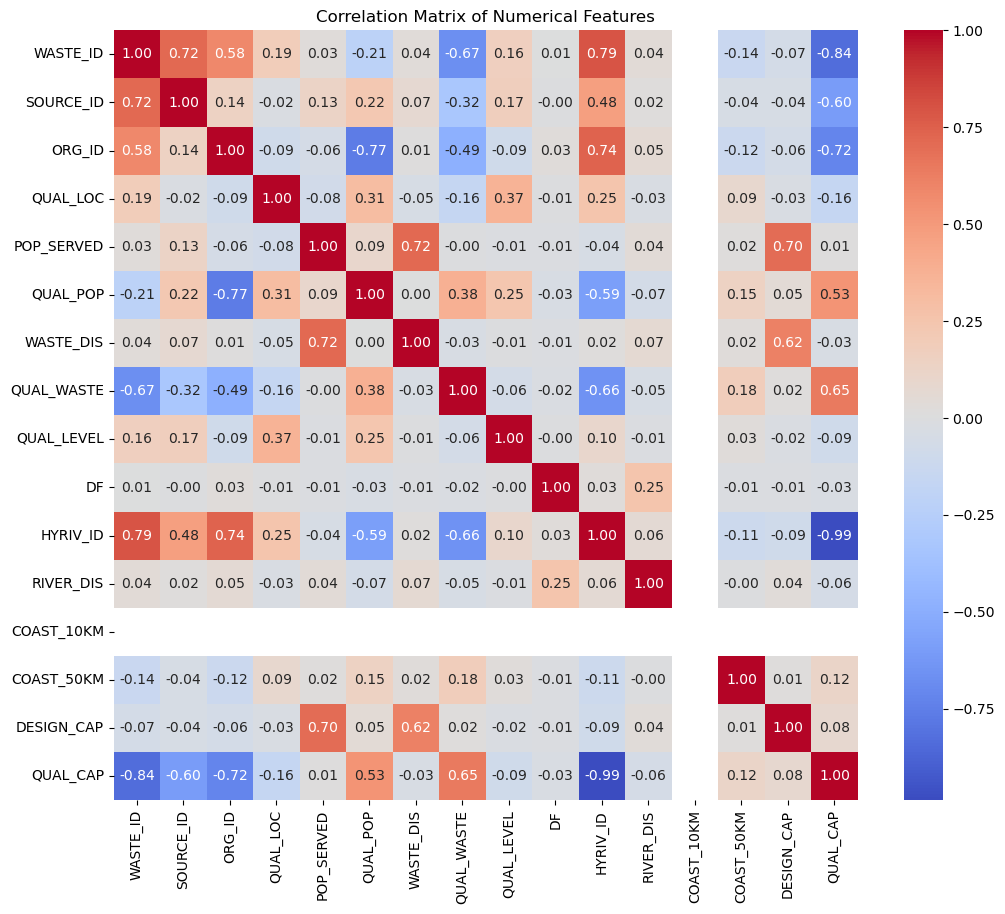

In [59]:
# Select numerical columns for the correlation matrix
numerical_data = df1.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

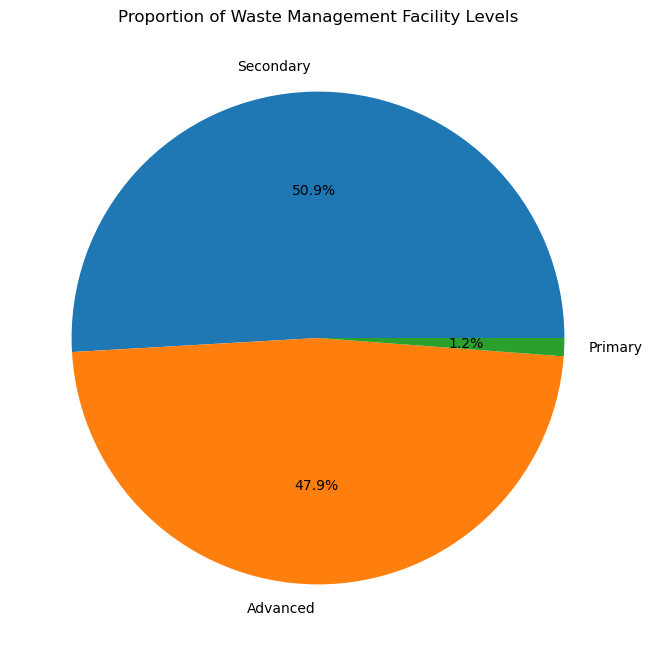

In [60]:
# Pie Chart for a Categorical Variable (e.g., 'LEVEL')
plt.figure(figsize=(8, 8))
df1['LEVEL'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Waste Management Facility Levels')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


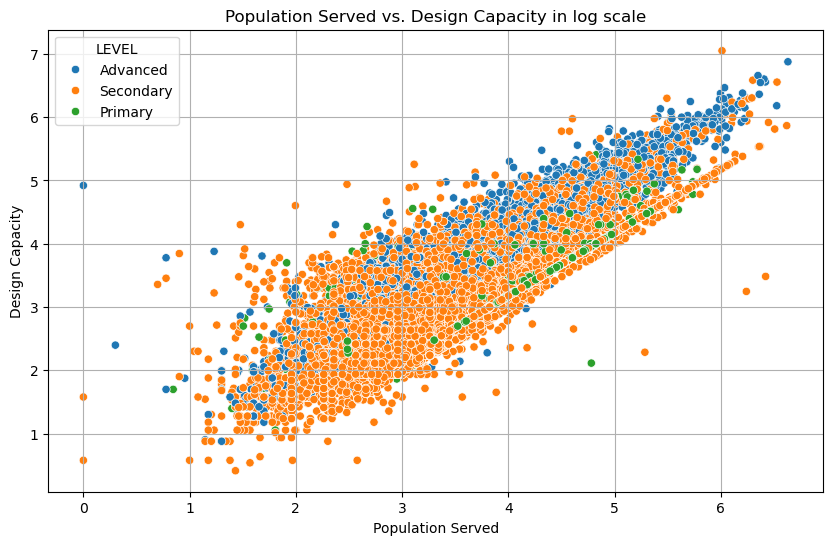

In [62]:
# Scatter Plot for Two Numerical Variables (e.g., 'POP_SERVED' vs. 'DESIGN_CAP')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log10(df1.POP_SERVED), y=np.log10(df1.DESIGN_CAP), hue = df1.LEVEL)
plt.title('Population Served vs. Design Capacity in log scale')
plt.xlabel('Population Served')
plt.ylabel('Design Capacity')
plt.grid()
plt.show()

In [63]:
df1['WASTE_RATIO'] = df1['WASTE_DIS'] / df1['POP_SERVED']

In [64]:
df1.drop(columns= "COAST_10KM", axis=1, inplace=True)

In [65]:
df1.columns

Index(['WASTE_ID', 'SOURCE_ID', 'ORG_ID', 'WWTP_NAME', 'COUNTRY', 'CNTRY_ISO',
       'LAT_WWTP', 'LON_WWTP', 'QUAL_LOC', 'LAT_OUT', 'LON_OUT', 'STATUS',
       'POP_SERVED', 'QUAL_POP', 'WASTE_DIS', 'QUAL_WASTE', 'LEVEL',
       'QUAL_LEVEL', 'DF', 'HYRIV_ID', 'RIVER_DIS', 'COAST_50KM', 'DESIGN_CAP',
       'QUAL_CAP', 'WASTE_RATIO'],
      dtype='object')

In [66]:
numerical_data = df1.select_dtypes(include=['float64', 'int64'])
numerical_data.columns

Index(['WASTE_ID', 'SOURCE_ID', 'ORG_ID', 'QUAL_LOC', 'POP_SERVED', 'QUAL_POP',
       'WASTE_DIS', 'QUAL_WASTE', 'QUAL_LEVEL', 'DF', 'HYRIV_ID', 'RIVER_DIS',
       'COAST_50KM', 'DESIGN_CAP', 'QUAL_CAP', 'WASTE_RATIO'],
      dtype='object')

In [67]:
id_columns = [col for col in df1.columns if col.endswith('ID')]
id_columns

['WASTE_ID', 'SOURCE_ID', 'ORG_ID', 'HYRIV_ID']

In [68]:
numerical_columns = numerical_data.columns.difference(id_columns)
numerical_data = df1[numerical_columns]

In [69]:
numerical_data.columns

Index(['COAST_50KM', 'DESIGN_CAP', 'DF', 'POP_SERVED', 'QUAL_CAP',
       'QUAL_LEVEL', 'QUAL_LOC', 'QUAL_POP', 'QUAL_WASTE', 'RIVER_DIS',
       'WASTE_DIS', 'WASTE_RATIO'],
      dtype='object')

In [70]:
categorical_columns = df1.select_dtypes(exclude=['int64', 'float64']).columns.union(id_columns)
categorical_data = df1[categorical_columns]

In [71]:
categorical_data.head()

,CNTRY_ISO,COUNTRY,HYRIV_ID,LAT_OUT,LAT_WWTP,LEVEL,LON_OUT,LON_WWTP,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
0,LTU,Lithuania,20228874.0,56.223,56.247,Advanced,22.627,22.726,1140441,1,Not Reported,1,Akmenes aglomeracija
1,LTU,Lithuania,20261585.0,54.519,54.432,Advanced,24.098,24.056,1140443,1,Not Reported,2,Alytaus m aglomeracija
2,LTU,Lithuania,20243105.0,55.452,55.509,Advanced,25.006,25.073,1140445,1,Not Reported,3,Anyksciu aglomeracija
3,LTU,Lithuania,20247446.0,55.21,55.252,Secondary,23.51,23.484,1140447,1,Not Reported,4,Ariogalos aglomeracija
4,LTU,Lithuania,20239330.0,55.681,55.644,Secondary,23.835,23.741,1140449,1,Not Reported,5,Baisogalos aglomeracija


In [72]:
numerical_data.head()

,COAST_50KM,DESIGN_CAP,DF,POP_SERVED,QUAL_CAP,QUAL_LEVEL,QUAL_LOC,QUAL_POP,QUAL_WASTE,RIVER_DIS,WASTE_DIS,WASTE_RATIO
0,0,4600.0,2421.974,1060,2,1,2,2,4,4.153,148.213,0.139824
1,0,220000.0,2534.527,87900,2,1,2,2,1,257.983,8797.904,0.100090
2,0,33000.0,1367.809,12400,2,1,2,2,1,30.995,1959.285,0.158007
3,0,4357.0,2061.969,2500,2,1,2,2,1,13.799,578.482,0.231393
4,0,1490.0,209.549,1200,2,1,2,2,4,0.405,167.788,0.139823


In [73]:
numerical_data.isna().sum()

COAST_50KM     0
DESIGN_CAP     0
DF             0
POP_SERVED     0
QUAL_CAP       0
QUAL_LEVEL     0
QUAL_LOC       0
QUAL_POP       0
QUAL_WASTE     0
RIVER_DIS      0
WASTE_DIS      0
WASTE_RATIO    0
dtype: int64

In [74]:
print((np.isinf(numerical_data)).sum())
numerical_data.replace([np.inf, -np.inf], 0, inplace=True)

COAST_50KM      0
DESIGN_CAP      0
DF              0
POP_SERVED      0
QUAL_CAP        0
QUAL_LEVEL      0
QUAL_LOC        0
QUAL_POP        0
QUAL_WASTE      0
RIVER_DIS       0
WASTE_DIS       0
WASTE_RATIO    23
dtype: int64


/var/folders/5j/rksnclcn09j1c7_n7bc6nmhr0000gn/T/ipykernel_16461/2304697381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.replace([np.inf, -np.inf], 0, inplace=True)


In [40]:
print((np.isinf(numerical_data)).sum())

COAST_50KM     0
DESIGN_CAP     0
DF             0
POP_SERVED     0
QUAL_CAP       0
QUAL_LEVEL     0
QUAL_LOC       0
QUAL_POP       0
QUAL_WASTE     0
RIVER_DIS      0
WASTE_DIS      0
WASTE_RATIO    0
dtype: int64


In [75]:
print((numerical_data).isna().sum())

COAST_50KM     0
DESIGN_CAP     0
DF             0
POP_SERVED     0
QUAL_CAP       0
QUAL_LEVEL     0
QUAL_LOC       0
QUAL_POP       0
QUAL_WASTE     0
RIVER_DIS      0
WASTE_DIS      0
WASTE_RATIO    0
dtype: int64


In [76]:
!pip install scikit-learn
from sklearn.preprocessing import normalize

In [77]:
# Normalize numerical data
numerical_data_scaled = normalize(numerical_data)
# If you want to convert it back to a DataFrame
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns, index=numerical_data.index)
# Recombine the data
data_scaled = pd.concat([numerical_data_scaled, categorical_data], axis=1)

In [78]:
data_scaled.columns

Index(['COAST_50KM', 'DESIGN_CAP', 'DF', 'POP_SERVED', 'QUAL_CAP',
       'QUAL_LEVEL', 'QUAL_LOC', 'QUAL_POP', 'QUAL_WASTE', 'RIVER_DIS',
       'WASTE_DIS', 'WASTE_RATIO', 'CNTRY_ISO', 'COUNTRY', 'HYRIV_ID',
       'LAT_OUT', 'LAT_WWTP', 'LEVEL', 'LON_OUT', 'LON_WWTP', 'ORG_ID',
       'SOURCE_ID', 'STATUS', 'WASTE_ID', 'WWTP_NAME'],
      dtype='object')

In [79]:
data_scaled.isna().sum()

COAST_50KM     0
DESIGN_CAP     0
DF             0
POP_SERVED     0
QUAL_CAP       0
QUAL_LEVEL     0
QUAL_LOC       0
QUAL_POP       0
QUAL_WASTE     0
RIVER_DIS      0
WASTE_DIS      0
WASTE_RATIO    0
CNTRY_ISO      0
COUNTRY        0
HYRIV_ID       0
LAT_OUT        0
LAT_WWTP       0
LEVEL          0
LON_OUT        0
LON_WWTP       0
ORG_ID         0
SOURCE_ID      0
STATUS         0
WASTE_ID       0
WWTP_NAME      0
dtype: int64

In [80]:
!pip install scipy

In [81]:
numerical_features = data_scaled.select_dtypes(include=['float64', 'int64'])
numerical_features = numerical_features[numerical_columns]

In [89]:
numerical_imp_features = ['POP_SERVED', 'WASTE_DIS']
numericalData = numerical_features[numerical_imp_features]

In [90]:
numericalData

,POP_SERVED,WASTE_DIS
0,0.199710,0.027924
1,0.370750,0.037108
2,0.350940,0.055451
3,0.457811,0.105934
4,0.621154,0.086852
...,...,...
52709,0.976369,0.146137
52710,0.957138,0.143259
52711,0.975199,0.145964
52712,0.978314,0.146428


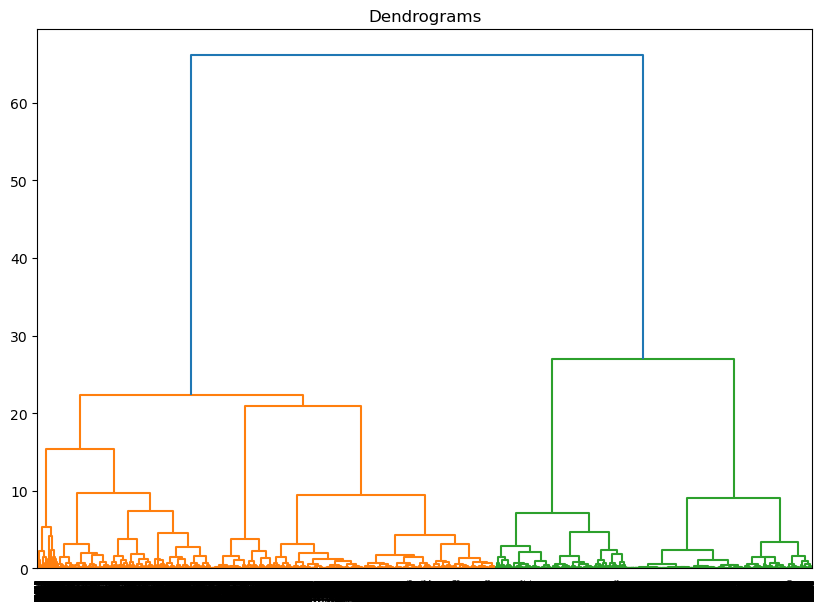

In [91]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(numericalData, method='ward'))

In [95]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_labels = cluster.fit_predict(numericalData)

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [96]:
data_scaled['Cluster'] = cluster_labels

In [98]:
data_scaled.head()

,COAST_50KM,DESIGN_CAP,DF,POP_SERVED,QUAL_CAP,QUAL_LEVEL,QUAL_LOC,QUAL_POP,QUAL_WASTE,RIVER_DIS,...,LAT_WWTP,LEVEL,LON_OUT,LON_WWTP,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME,Cluster
0,0.0,0.866667,0.456314,0.199710,0.000377,0.000188,0.000377,0.000377,0.000754,0.000782,...,56.247,Advanced,22.627,22.726,1140441,1,Not Reported,1,Akmenes aglomeracija,3
1,0.0,0.927929,0.010690,0.370750,0.000008,0.000004,0.000008,0.000008,0.000004,0.001088,...,54.432,Advanced,24.098,24.056,1140443,1,Not Reported,2,Alytaus m aglomeracija,2
2,0.0,0.933952,0.038711,0.350940,0.000057,0.000028,0.000057,0.000057,0.000028,0.000877,...,55.509,Advanced,25.006,25.073,1140445,1,Not Reported,3,Anyksciu aglomeracija,2
3,0.0,0.797873,0.377597,0.457811,0.000366,0.000183,0.000366,0.000366,0.000183,0.002527,...,55.252,Secondary,23.51,23.484,1140447,1,Not Reported,4,Ariogalos aglomeracija,2
4,0.0,0.771266,0.108468,0.621154,0.001035,0.000518,0.001035,0.001035,0.002071,0.000210,...,55.644,Secondary,23.835,23.741,1140449,1,Not Reported,5,Baisogalos aglomeracija,0


In [105]:
data_scaled[["POP_SERVED", "WASTE_DIS", "Cluster"]]

,POP_SERVED,WASTE_DIS,Cluster
0,0.199710,0.027924,3
1,0.370750,0.037108,2
2,0.350940,0.055451,2
3,0.457811,0.105934,2
4,0.621154,0.086852,0
...,...,...,...
52709,0.976369,0.146137,0
52710,0.957138,0.143259,0
52711,0.975199,0.145964,0
52712,0.978314,0.146428,0


In [107]:
data_scaled[data_scaled["Cluster"] == 2]

,COAST_50KM,DESIGN_CAP,DF,POP_SERVED,QUAL_CAP,QUAL_LEVEL,QUAL_LOC,QUAL_POP,QUAL_WASTE,RIVER_DIS,...,LAT_WWTP,LEVEL,LON_OUT,LON_WWTP,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME,Cluster
1,0.0,0.927929,0.010690,0.370750,0.000008,0.000004,0.000008,0.000008,0.000004,0.001088,...,54.432,Advanced,24.098,24.056,1140443,1,Not Reported,2,Alytaus m aglomeracija,2
2,0.0,0.933952,0.038711,0.350940,0.000057,0.000028,0.000057,0.000057,0.000028,0.000877,...,55.509,Advanced,25.006,25.073,1140445,1,Not Reported,3,Anyksciu aglomeracija,2
3,0.0,0.797873,0.377597,0.457811,0.000366,0.000183,0.000366,0.000366,0.000183,0.002527,...,55.252,Secondary,23.51,23.484,1140447,1,Not Reported,4,Ariogalos aglomeracija,2
11,0.0,0.885310,0.011938,0.455302,0.000253,0.000126,0.000253,0.000253,0.000126,0.000101,...,55.327,Advanced,26.065,26.166,1140463,1,Not Reported,12,Ignalinos aglomeracija,2
13,0.0,0.939960,0.002235,0.333933,0.000082,0.000041,0.000082,0.000082,0.000041,0.000043,...,56.256,Advanced,23.698,23.629,1140467,1,Not Reported,14,Joniskio aglomeracija,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52558,0.0,0.051999,0.934764,0.347408,0.000052,0.000052,0.000052,0.000156,0.000104,0.010818,...,11.773,Secondary,77.773,77.803,661,9,Proposed,52559,METTUR MUNICIPALIT Y STP SALEM CAMP City SNo 2...,2
52559,0.0,0.051999,0.934764,0.347408,0.000052,0.000052,0.000052,0.000156,0.000104,0.010818,...,11.766,Secondary,77.773,77.807,662,9,Proposed,52560,METTUR MUNICIPALIT Y STP NEAR MTPS Salem,2
52583,0.0,0.061006,0.908105,0.407597,0.000015,0.000015,0.000015,0.000046,0.000031,0.042041,...,17.665,Primary,80.898,80.883,686,9,Operational,52584,Bhadrachalam,2
52626,0.0,0.052960,0.931306,0.353836,0.000013,0.000013,0.000013,0.000040,0.000026,0.043115,...,25.16,Primary,82.465,82.511,729,9,Operational,52627,WSB STP Vindhyanchal,2


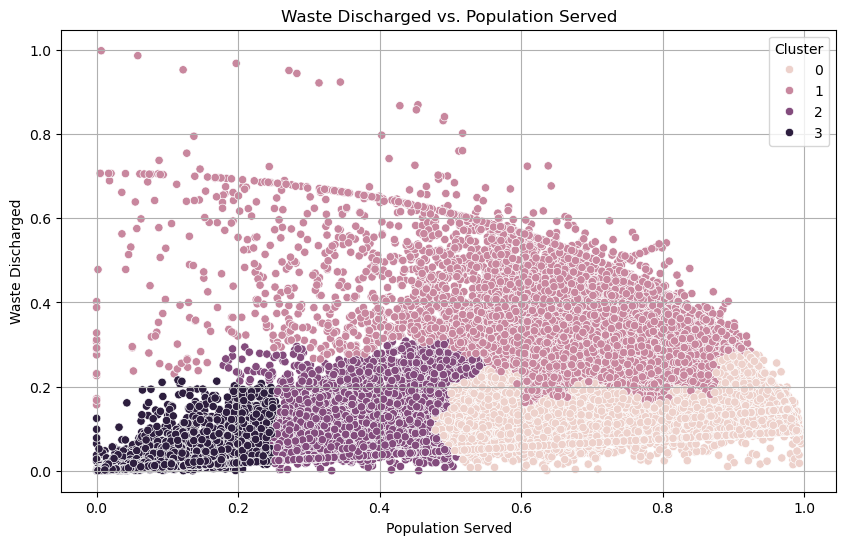

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.POP_SERVED, y=data_scaled.WASTE_DIS, hue = data_scaled.Cluster)
plt.title('Waste Discharged vs. Population Served')
plt.xlabel('Population Served')
plt.ylabel('Waste Discharged')
plt.grid()
plt.show()

In [108]:
# I split the data at 3 after looking at the dendogram
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_labels = cluster.fit_predict(numericalData)

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [109]:
data_scaled['Cluster1'] = cluster_labels

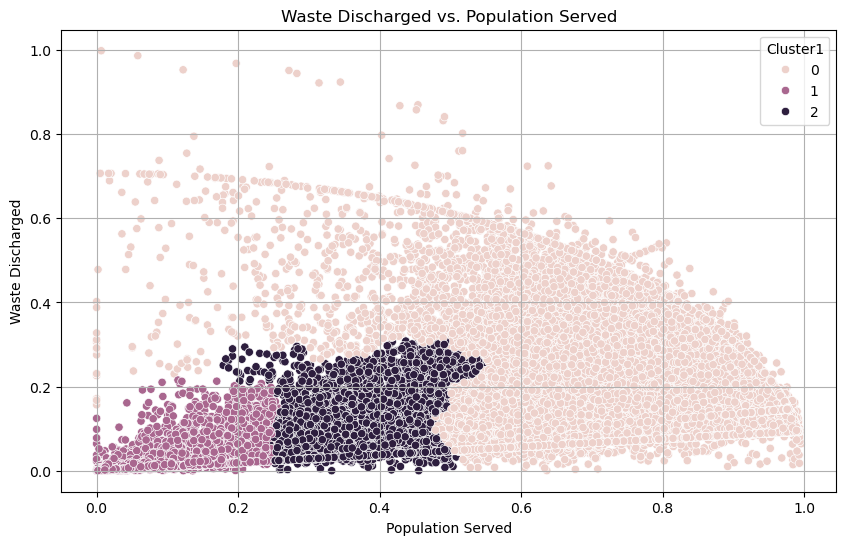

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.POP_SERVED, y=data_scaled.WASTE_DIS, hue = data_scaled.Cluster1)
plt.title('Waste Discharged vs. Population Served')
plt.xlabel('Population Served')
plt.ylabel('Waste Discharged')
plt.grid()
plt.show()

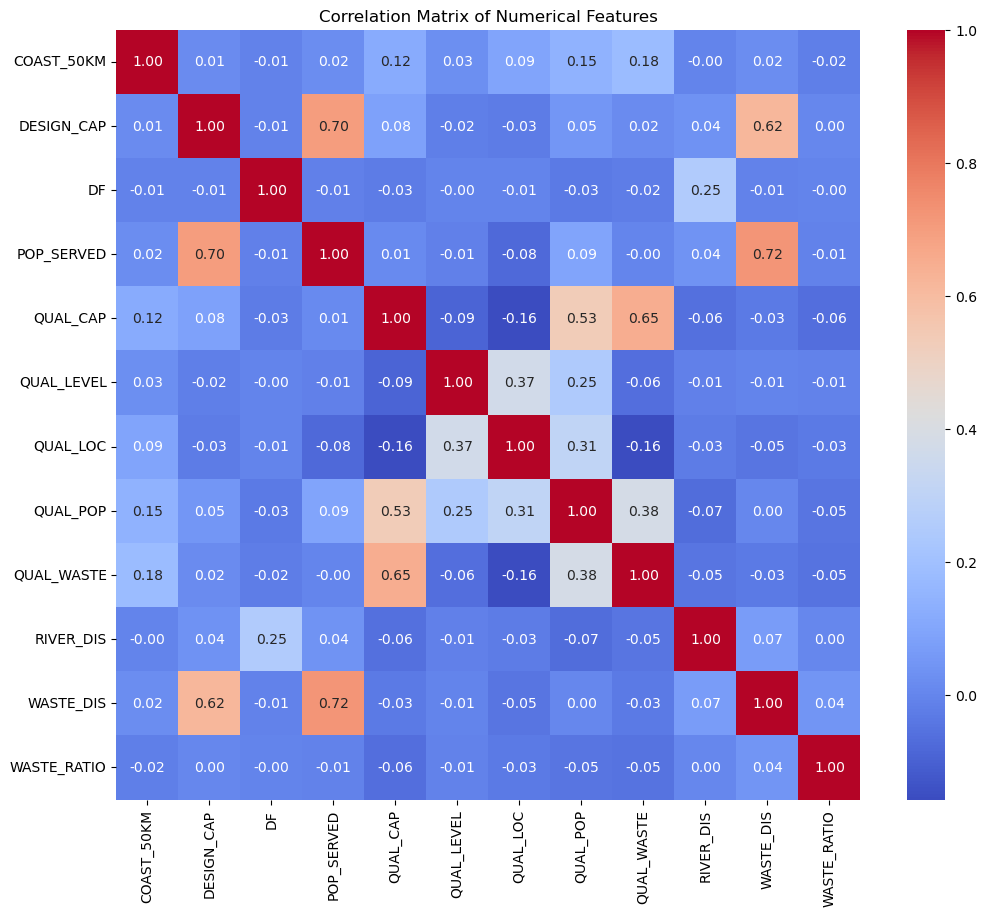

In [117]:
corr_matrix = numerical_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [122]:
# Clustering Dataset based on Population Served and Design Capacity
numerical_imp_features = ['POP_SERVED', 'DESIGN_CAP']
numericalData = numerical_features[numerical_imp_features]

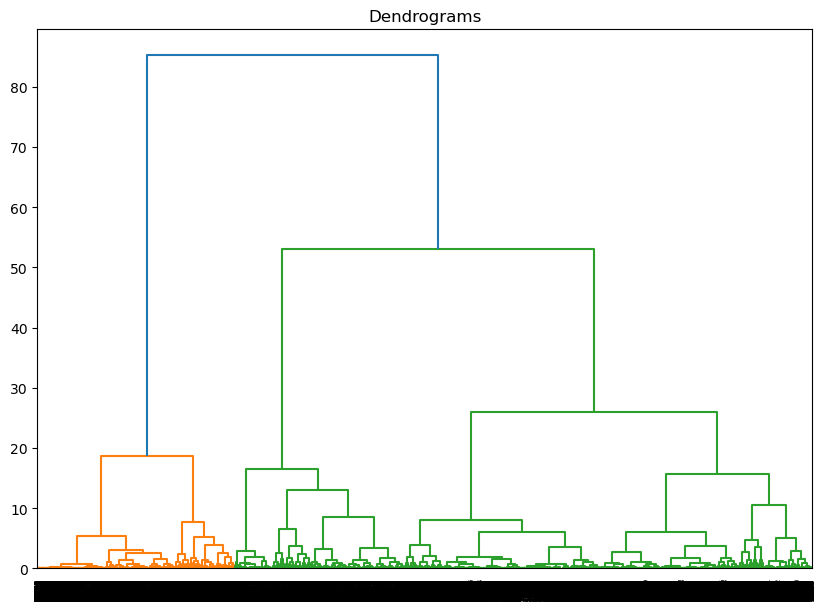

In [120]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(numericalData, method='ward'))

In [121]:
# Looking at the Dendogram I split the data at cluster = 3
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_labels = cluster.fit_predict(numericalData)

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [123]:
data_scaled['Cluster2'] = cluster_labels

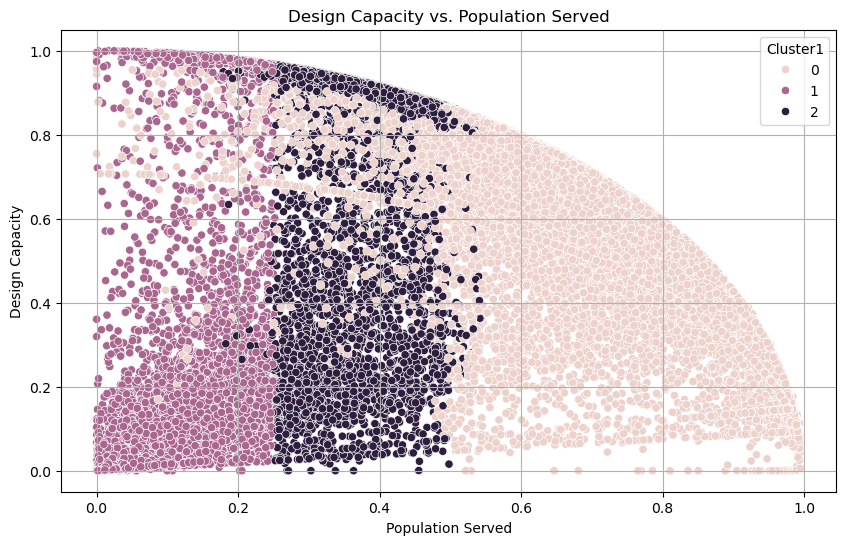

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.POP_SERVED, y=data_scaled.DESIGN_CAP, hue = data_scaled.Cluster1)
plt.title('Design Capacity vs. Population Served')
plt.xlabel('Population Served')
plt.ylabel('Design Capacity')
plt.grid()
plt.show()

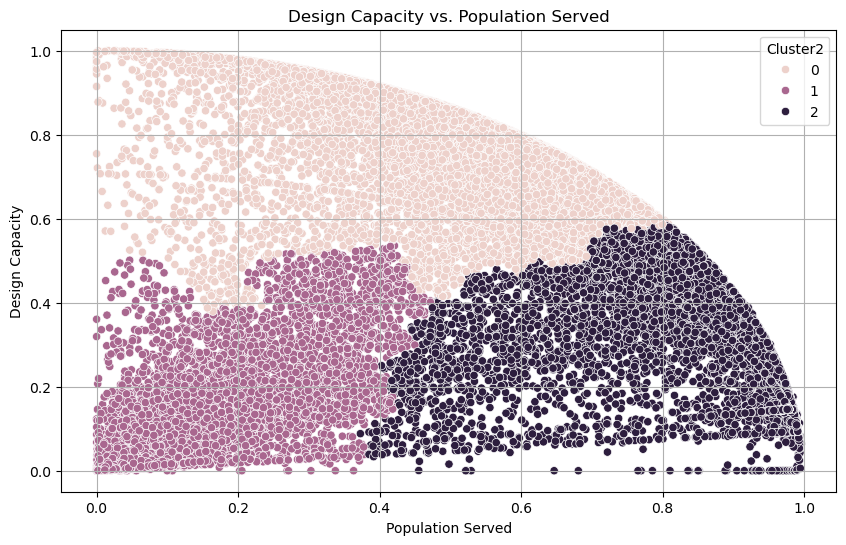

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.POP_SERVED, y=data_scaled.DESIGN_CAP, hue = data_scaled.Cluster2)
plt.title('Design Capacity vs. Population Served')
plt.xlabel('Population Served')
plt.ylabel('Design Capacity')
plt.grid()
plt.show()

In [138]:
data_scaled.groupby(by = "Cluster1")[["POP_SERVED", "WASTE_DIS", "DESIGN_CAP", "DF", "RIVER_DIS"]].mean()

,POP_SERVED,WASTE_DIS,DESIGN_CAP,DF,RIVER_DIS
Cluster1,,,,,
0,0.687806,0.209138,0.584600,0.128301,0.001919
1,0.079219,0.024557,0.155814,0.916690,0.003521
2,0.388322,0.108447,0.670963,0.395999,0.003427


In [ ]:
# country_counts = df.groupby(by="COUNTRY").size()
# filtered_countries = country_counts[country_counts >= 5]

In [ ]:
# sorted_series_descending = filtered_countries.sort_values(ascending=False)
# filtered_countries = list(sorted_series_descending.keys())

In [ ]:
# df1 = df[df['COUNTRY'].isin(filtered_countries)]

In [ ]:
# df1[['WASTE_DIS', 'POP_SERVED']] = df1[['WASTE_DIS', 'POP_SERVED']].replace('0', np.nan)


In [ ]:
# df1.isna().sum()

In [ ]:
# df1.head()

In [ ]:
# df1 = df1.drop(columns=["LAT_OUT", "LON_OUT"])

In [ ]:
# subset = df1.groupby(['COUNTRY', 'LEVEL']).agg(
#     plants=('COUNTRY', 'size'),  # Correctly counts the number of occurrences for each continent
#     avg_waste_ratio=('QUAL_WASTE', 'mean')  # Average of 'WASTE_RATIO', automatically skips NAs
# ).reset_index()
# subset



In [ ]:
# df1.head()

In [ ]:
# df1["QUAL_WASTE"].unique()

In [ ]:
# df1["LEVEL"].unique()

In [ ]:
# df1["STATUS"].unique()

In [ ]:
# # Find rows where WWTP_NAME is an empty string
# empty_wwtp_name = df1['WWTP_NAME'] == ""

# # Now you can perform operations on these rows. For example, to set them to NaN:
# df1.loc[empty_wwtp_name, 'WWTP_NAME'] = np.nan

In [ ]:
# # Find rows where WWTP_NAME is an empty string
# empty_df = df1['DF'] == ""

# # Now you can perform operations on these rows. For example, to set them to NaN:
# df1.loc[empty_df, 'DF'] = np.nan

In [ ]:
# for column in df1.columns:
#     temp = df1[column] == ""
#     df1.loc[temp, column] = np.nan

In [ ]:
# print(f"Total percentage of nan val in dataset: {round(max(df1.isna().sum()) / df1.shape[0] * 100, 2)}%")

In [ ]:
# df1['DF'] = pd.to_numeric(df1['DF'], errors='coerce')

# # Calculate the mean of the column, excluding NaN values
# median_value = df1['DF'].median()

# # Replace NaN values in the 'DF' column with the mean
# df1['DF'].fillna(median_value, inplace=True)

In [ ]:
# df1.DF

In [ ]:
# df1.dropna(inplace=True)

In [ ]:
# df1.head()

In [ ]:
# df1.isna().sum()

In [ ]:
# df1[df1.DF == max(df1.DF)]

In [ ]:
# sns.countplot(x='LEVEL', data=df1)

In [ ]:
# country_counts = dict(df1.SOURCE_ID.value_counts())
# country_mapping = {
#     1: "Europe",
#     2: "United States",
#     3: "Brazil",
#     4: "Mexico",
#     5: "China",
#     6: "Canada",
#     7: "Australia",
#     8: "South Africa",
#     9: "India",
#     10: "New Zealand",
#     11: "Peru",
#     12: "Remaining Countries"
# }

# # Replacing numbers with country names
# replaced_counts = {country_mapping[int(number)]: count for number, count in country_counts.items()}
# replaced_counts

In [ ]:
# labels = replaced_counts.keys()
# sizes = replaced_counts.values()
# colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']

# # Plotting the pie chart
# plt.figure(figsize=(5, 5))
# plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('WWTP by Country')
# plt.show()

In [ ]:
# df1.info()

In [ ]:
# numerical_col = []
# for col in df1.columns:
#     if df1[col].dtype != "object":
#         numerical_col.append(col)
# numerical_col = [col for col in numerical_col if not col.endswith("ID")]
# numerical_col

In [ ]:
# sns.countplot(x='QUAL_LOC', data=df1)

In [ ]:
# df1.describe()

In [ ]:
# subset_df = df1[df1['QUAL_LOC'].isin([1, 2, 3])].copy()
# subset_df['QUAL_LOC'] = subset_df['QUAL_LOC'].replace({1: 'High', 2: 'Medium', 3: 'Low'})

# # Using sns.countplot with 'hue'
# plt.figure(figsize=(10, 6))
# sns.countplot(data=subset_df, x='LEVEL', hue='QUAL_LOC', palette='Set2')

# plt.title('Distribution of Treatment Levels by Quality Location Indicator')
# plt.xlabel('Treatment Level')
# plt.ylabel('Count')
# plt.legend(title='QUAL_LOC', title_fontsize='13', labelspacing=1.2)

# plt.show()

In [ ]:
# subset_df = df1[df1['QUAL_LOC'].isin([1, 2, 3])].copy()

# # Using sns.countplot with 'hue'
# plt.figure(figsize=(10, 6))
# sns.countplot(data=subset_df, x='SOURCE_ID', hue='QUAL_LOC', palette='Set2')

# plt.title('Distribution of Treatment Levels by Quality Location Indicator')
# plt.xlabel('Treatment Level')
# plt.ylabel('Count')
# plt.legend(title='QUAL_LOC', title_fontsize='13', labelspacing=1.2)

# plt.show()

In [ ]:
# sns.scatterplot(x = df1.DESIGN_CAP, y = df1.POP_SERVED, hue = df1.LEVEL)

In [ ]:
# sns.scatterplot(x = df1.WASTE_DIS, y = df1.DESIGN_CAP, hue = df1.LEVEL)

In [ ]:
# df1.corr()

In [ ]:
# plt.figure(figsize=(16, 6))
# # define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
# heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# # from pydantic import BaseSettings # OLD
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df1)
# prof.to_file(output_file='output.html')

In [ ]:
# df1.head()

In [ ]:
# df1.head()

In [ ]:
# sns.histplot(df1.RIVER_DIS, kde = True, bins=range(int(min(df1.RIVER_DIS)) - (int(min(df1.RIVER_DIS)) % 1000), 
#                                    int(max(df1.RIVER_DIS)) + 1000, 1000), 
#          alpha=0.5, edgecolor='black')

# plt.xlim(0, 5000)  # Setting x-axis limit to 5000
# plt.xticks(range(0, 6001, 1000))  # Adjusting x-ticks to match the new x-axis limit
# plt.yticks(range(0, 50001, 10000))
# plt.xlabel('River Distance')
# plt.ylabel("Frequency")
# plt.show()



In [ ]:
# sns.scatterplot(x = np.log10(df1.DESIGN_CAP), y = np.log10(df1.POP_SERVED), hue = df1.LEVEL)
# plt.xlabel("Design Capacity")
# plt.ylabel("Population Served")

In [ ]:
# df1.COAST_50KM.unique()

In [ ]:
# max(df1.RIVER_DIS)

In [ ]:
# min(df1.WASTE_DIS)
# min(df1.POP_SERVED)

In [ ]:
# df1[['WASTE_DIS', 'POP_SERVED']] = df1[['WASTE_DIS', 'POP_SERVED']].replace(0, np.nan)


In [ ]:
# df1.info()

In [ ]:
# df1['WASTE_RATIO'] = df1['WASTE_DIS'] / df1['POP_SERVED']

In [ ]:
# df1.head()

In [ ]:
# df1['CONTINENT'] = coco.convert(names=df1['CNTRY_ISO'], to='continent')

In [ ]:
# df1.head()

In [ ]:
# df1.COUNTRY.value_counts()

In [ ]:
# df_agg = df1.groupby('SOURCE_ID')['WASTE_RATIO'].mean().reset_index()
# df_agg

In [ ]:
# df_agg['COUNTRY'] = df_agg['SOURCE_ID'].map(country_mapping)

In [ ]:
# df_agg

In [ ]:
# plt.figure(figsize=(5, 5))  # Optional: Adjusts the size of the figure
# colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']
# plt.pie(x=df_agg['WASTE_RATIO'], labels=df_agg['COUNTRY'], colors=colors, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Waste Ratio Distribution by Country')
# plt.show()

In [ ]:
# df1.head()

In [ ]:
# df1.drop(columns=["COAST_10KM"], inplace=True)

In [ ]:
# plt.figure(figsize=(16, 6))
# # define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
# heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# continents_agg = df1.groupby('CONTINENT').agg(
#     plants=('CONTINENT', 'size'),  # Correctly counts the number of occurrences for each continent
#     avg_pop_served=('POP_SERVED', 'mean'),  # Average of 'POP_SERVED', automatically skips NAs
#     avg_disposal=('WASTE_DIS', 'mean'),  # Average of 'WASTE_DIS', automatically skips NAs
#     avg_waste_ratio=('WASTE_RATIO', 'mean')  # Average of 'WASTE_RATIO', automatically skips NAs
# ).reset_index()

In [ ]:
# continents_agg = continents_agg.sort_values(by='plants', ascending=False)
# continents_agg = continents_agg[continents_agg['CONTINENT'].notna()]

In [ ]:
# continents_agg

In [ ]:
# df1.LEVEL

In [ ]:
# plant_levels = df1.groupby(['CONTINENT', 'LEVEL']).agg(
#     plants=('CONTINENT', 'size'),  # Correctly counts the number of occurrences for each continent
#     avg_waste_ratio=('WASTE_RATIO', 'mean')  # Average of 'WASTE_RATIO', automatically skips NAs
# ).reset_index()

In [ ]:
# plant_levels

In [ ]:
# sns.barplot(x = plant_levels.CONTINENT, y = plant_levels.plants, hue=plant_levels.LEVEL)

In [ ]:
# sns.barplot(x = plant_levels.CONTINENT, y = plant_levels.avg_waste_ratio, hue=plant_levels.LEVEL)

In [ ]:
# wwtp_india = df1[df1.COUNTRY == "India"]

In [ ]:
# avg_waste_ratio_india = wwtp_india['WASTE_RATIO'].mean(skipna=True)

In [ ]:
# print(f"Avg waste ratio in India is {round(avg_waste_ratio_india, 4)}")

In [ ]:
# # Load countries data from Natural Earth through GeoPandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Select only the 'name', 'continent', and 'geometry' columns
# world = world[['name', 'continent', 'geometry']]

# # Filter for India
# india_boundry = world[world['name'] == "India"]

# # Display the result
# india_boundry

In [ ]:
# india_df = df1[df1['COUNTRY'] == "India"]
# india_df.head()

In [ ]:
# gdf = gpd.GeoDataFrame(india_df, geometry=gpd.points_from_xy(india_df.LON_WWTP, india_df.LAT_WWTP), crs="EPSG:4326")
# gdf.head()

In [ ]:
# # Assuming 'df' is your pandas DataFrame containing 'level', 'waste_ratio', and 'coast_10km' columns

# # Convert 'coast_10km' to a categorical type if it's not already
# df1['COAST_50KM'] = df1['COAST_50KM'].astype('category')

# # Create the jitter plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.stripplot(data=df1, x='LEVEL', y='WASTE_RATIO', hue='COAST_50KM', jitter=True, alpha=0.5, dodge=True, palette='viridis')

# # Set the y-axis to log scale
# plt.yscale('log')

# # Customizing the plot with titles and labels
# plt.title('Waste Water Discharge Per Capita')
# plt.suptitle('Waste Water Discharge Per Capita by Distance to Coast and Level', fontsize=10)
# plt.xlabel('Distance to Coast')
# plt.ylabel('Waste Water Discharge Per Capita')
# plt.legend(title='Coast, 50km')

# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))
# india_boundry.plot(ax=ax, color='none', edgecolor='black')

# # Plot points
# gdf.plot(ax=ax, column='WASTE_RATIO', cmap='viridis', alpha=0.7, markersize=20, legend=True, norm=Normalize(vmin=gdf['WASTE_RATIO'].min(), vmax=gdf['WASTE_RATIO'].max()))
# ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# # Adjusting the plot
# ax.set_title('Waste Ratio by Location in India')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# plt.show()

In [ ]:
# from sklearn.cluster import KMeans
# X = india_df[['WASTE_RATIO']].values

In [ ]:
# k = 3  # Example number of clusters

# # Perform K-Means clustering
# kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

In [ ]:
# # Assign the cluster labels back to the DataFrame
# india_df['Cluster'] = kmeans.labels_

In [ ]:
# india_df

In [ ]:
# india_df.Cluster.value_counts()

In [ ]:
# india_df["DummyY"] = india_df['Cluster'].apply(lambda x: x + np.random.random())  # To spread out points vertically

In [ ]:
# # Assuming india_df is your DataFrame and centroids are calculated from your clustering model
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=india_df, x='WASTE_RATIO', y='DummyY', hue='Cluster', palette='viridis', legend='full', s=50)

# # Here's an example where we just plot them across a fixed range in the y-axis to show their presence
# for i, centroid in enumerate(centroids[:, 0]):  # Loop through each centroid's x-value
#     plt.scatter(centroid, i + 0.5, s=50, c='red', marker='X')  # i + 0.5 just as an example to spread centroids

# plt.title('Clusters of WWTP based on WASTE_RATIO with Approximated Centroids')
# plt.xlabel('Waste Ratio')
# plt.ylabel('')
# plt.yticks([])  # Hide y-axis ticks
# plt.legend(title='Cluster')
# plt.show()

In [ ]:
# india_df[india_df['Cluster'] == 0].head()

In [ ]:
# india_df[india_df['Cluster'] == 0].tail()

In [ ]:
# india_df[india_df['Cluster'] == 1].head()

In [ ]:
# india_df[india_df['Cluster'] == 2].head()

In [ ]:
# india_df["RIVER_WASTE"] = india_df["RIVER_DIS"]/india_df['POP_SERVED']

In [ ]:
# wwtp_usa = df1[df1.COUNTRY == "United States"]

In [ ]:
# avg_waste_ratio_usa = wwtp_usa['WASTE_RATIO'].mean(skipna=True)

In [ ]:
# print(f"Avg waste ratio in the US is {round(avg_waste_ratio_usa, 4)}")

In [ ]:
# # Load countries data from Natural Earth through GeoPandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Select only the 'name', 'continent', and 'geometry' columns
# world = world[['name', 'continent', 'geometry']]

# # Filter for USA
# usa_boundry = world[world['name'] == "United States of America"]

# # Display the result
# usa_boundry

In [ ]:
# usa_df = df1[df1['COUNTRY'] == "United States"]
# # usa_df.head()

In [ ]:
# gdf = gpd.GeoDataFrame(usa_df, geometry=gpd.points_from_xy(usa_df.LON_WWTP, usa_df.LAT_WWTP), crs="EPSG:4326")
# gdf.head()

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))
# usa_boundry.plot(ax=ax, color='none', edgecolor='black')

# # Plot points
# gdf.plot(ax=ax, column='WASTE_RATIO', cmap='viridis', alpha=0.7, markersize=20, legend=True, norm=Normalize(vmin=gdf['WASTE_RATIO'].min(), vmax=gdf['WASTE_RATIO'].max()))
# ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# # Adjusting the plot
# ax.set_title('Waste Ratio by Location in India')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# plt.show()

In [ ]:
# X = usa_df[['WASTE_RATIO']].values

In [ ]:
# k = 3  # Example number of clusters

# # Perform K-Means clustering
# kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

In [ ]:
# usa_df['Cluster'] = kmeans.labels_

In [ ]:
# usa_df["Cluster"].value_counts()

In [ ]:
# usa_df["DummyY"] = usa_df['Cluster'].apply(lambda x: x + np.random.random())  # To spread out points vertically

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=usa_df, x='WASTE_RATIO', y='DummyY', hue='Cluster', palette='viridis', legend='full', s=50)

# # Here's an example where we just plot them across a fixed range in the y-axis to show their presence
# for i, centroid in enumerate(centroids[:, 0]):  # Loop through each centroid's x-value
#     plt.scatter(centroid, i + 0.5, s=50, c='red', marker='X')  # i + 0.5 just as an example to spread centroids

# plt.title('Clusters of WWTP based on WASTE_RATIO with Approximated Centroids')
# plt.xlabel('Waste Ratio')
# plt.ylabel('')
# plt.yticks([])  # Hide y-axis ticks
# plt.legend(title='Cluster')
# plt.show()

In [ ]:
# usa_df[usa_df["Cluster"] == 0].head()

In [ ]:
# usa_df[usa_df["Cluster"] == 1].head()

In [ ]:
# usa_df[usa_df["Cluster"] == 2].head()